# EMPLOYEE CHURN ANALYSIS

## IMPORTING MODULES

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA


import time


## PRE-PROCESSING 

In [162]:
df=pd.read_csv("data.csv") # READING THE CSV FILE 
df.isnull().sum() # CHECKING FOR NULL OR NAN VALUES

Age                         22
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                  22
DistanceFromHome             0
Education                    0
EducationField              15
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction             32
MaritalStatus               22
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                    12
PercentSalaryHike            0
PerformanceRating            1
RelationshipSatisfaction     0
StandardHours                1
StockOptionLevel             1
TotalWorkingYears            3
TrainingTimesLastYear        2
WorkLifeBalance              0
YearsAtCompany               2
YearsInC

In [163]:
df.head() 


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80.0,0.0,8.0,0.0,1,6.0,4.0,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80.0,1.0,10.0,3.0,3,10.0,7.0,1,7.0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80.0,0.0,7.0,3.0,3,0.0,NaN,0,0.0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,NaN,0.0,8.0,3.0,3,8.0,7.0,3,0.0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80.0,1.0,6.0,3.0,3,2.0,2.0,2,2.0


In [164]:
df.dtypes # Datatype of each attribute where Attrition is the target variable 

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StandardHours               float64
StockOptionLevel            

In [165]:
df.columns # the attributes 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad15e2bf90>,
      dtype=object)

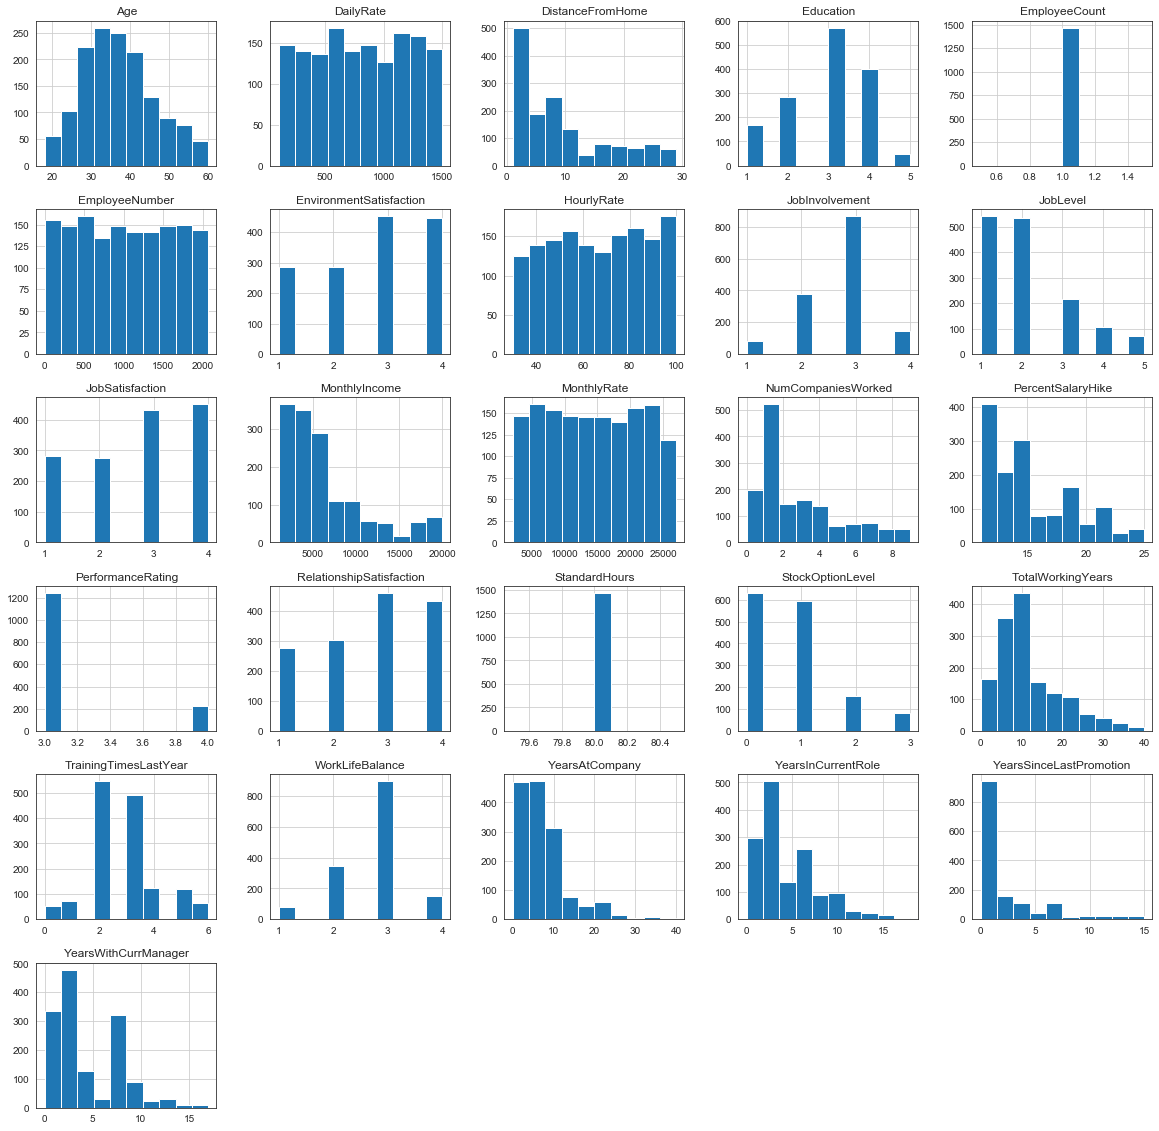

In [166]:
df.hist(figsize=(20,20)) # Histogram representation 

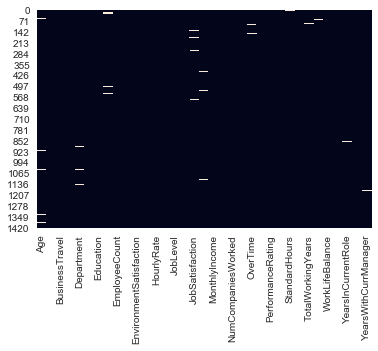

In [167]:
sns.heatmap(df.isnull(),cbar=False) # heatmap for null values 

In [168]:
df["EducationField"].value_counts()


Life Sciences       602
Medical             460
Marketing           156
Technical Degree    130
Other                80
Human Resources      27
Name: EducationField, dtype: int64

In [169]:
df.EducationField.fillna(method="ffill", inplace=True)

In [170]:
df.Age=df.Age.fillna(df.Age.mean())

In [171]:
df.Department=df.Department.fillna(df.Department.mode()[0])

In [172]:
df.MaritalStatus=df.MaritalStatus.fillna(method="bfill")

In [173]:
df.JobSatisfaction=df.JobSatisfaction.fillna(df.JobSatisfaction.mean())

In [174]:
df.OverTime=df.OverTime.fillna(df.OverTime.mode()[0])

In [175]:
df.StandardHours=df.StandardHours.fillna(df.StandardHours.mode()[0])

In [176]:
df.YearsWithCurrManager=df.YearsWithCurrManager.fillna(df.YearsWithCurrManager.mean())

In [177]:
df.TotalWorkingYears=df.TotalWorkingYears.fillna(df.TotalWorkingYears.mean())

In [178]:
df.TrainingTimesLastYear=df.TrainingTimesLastYear.fillna(df.TrainingTimesLastYear.mean())

In [179]:
df.YearsAtCompany=df.YearsAtCompany.fillna(df.YearsAtCompany.mean())

In [180]:
df.PerformanceRating = df.PerformanceRating.fillna(df.PerformanceRating.mean())
df.StockOptionLevel =df.StockOptionLevel.fillna(df.StockOptionLevel.mean())


In [181]:
df.YearsInCurrentRole=df.YearsInCurrentRole.fillna(df.YearsInCurrentRole.mean())

In [182]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

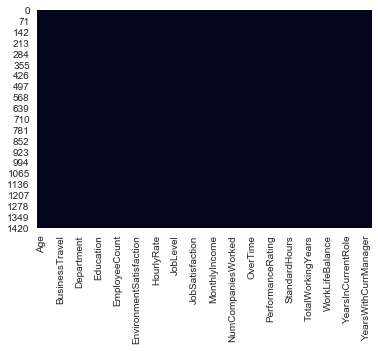

In [183]:
sns.heatmap(df.isnull(),cbar=False)

## DATA VISUALISATIONS 

In [184]:
df_copy = df.copy()
df_copy['Target'] = df_copy['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [185]:
correlations=df_copy.corr()['Target'].sort_values()
corr = df_copy.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

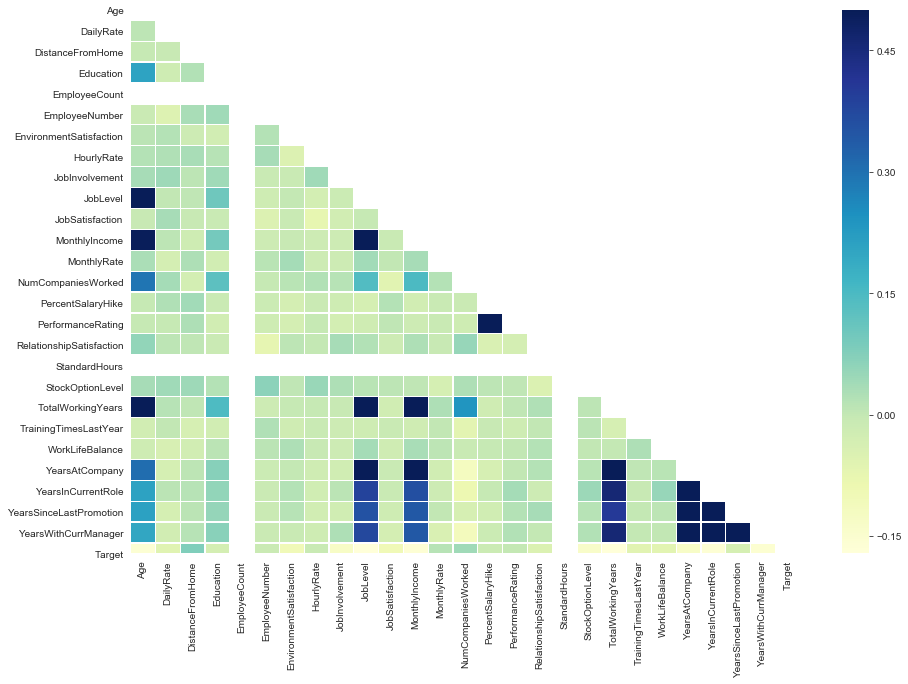

In [186]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            linewidths=.2, cmap="YlGnBu")

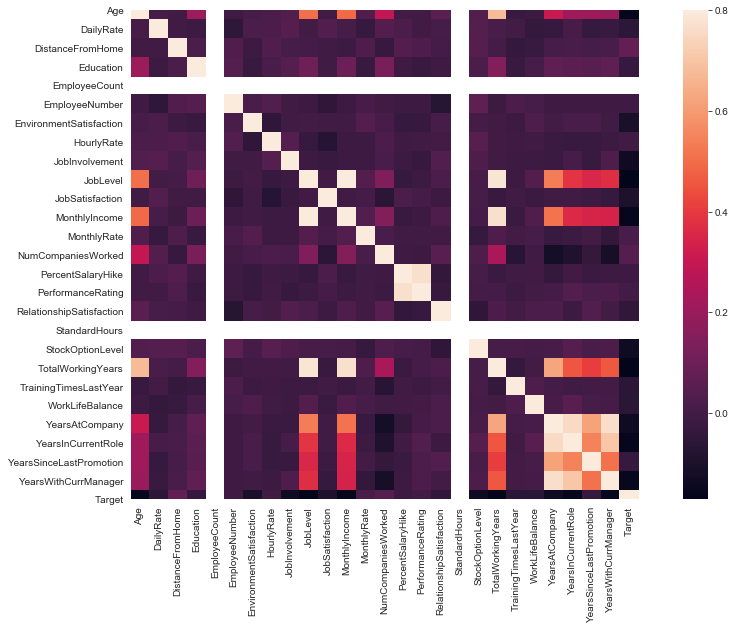

In [187]:
corr = df_copy.corr()
f,ax = plt.subplots(figsize=(16,9))
sns.heatmap(corr, vmax = 0.8,square ='TRUE' )

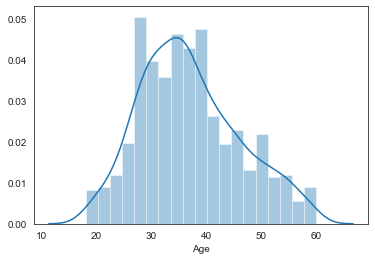

In [188]:
# distplot for the age attribute 
sns.distplot(df_copy['Age'])


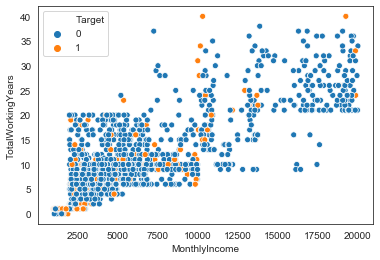

In [189]:
#How satisfied the employees are?
sns.scatterplot(x= df_copy['MonthlyIncome'], y = df_copy['TotalWorkingYears'], hue = df_copy['Target'])

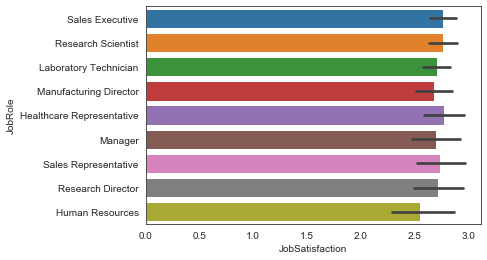

In [190]:
#How many of them satisfied with the job

sns.barplot(y=df_copy['JobRole'], x=df_copy['JobSatisfaction'],estimator = np.mean, data = df_copy)

In [191]:
for i in df_copy.columns:
    if df_copy[i].dtype == df_copy["YearsWithCurrManager"].dtype:
        df_copy[i]=df_copy[i].astype("int")

In [192]:
# USE df_copy for dataframe , Target column as Attrition column 

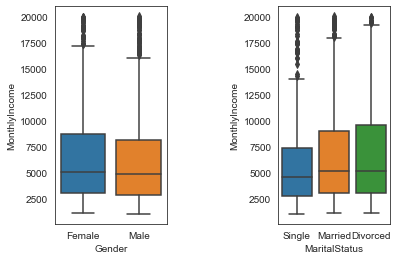

In [193]:
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)

sns.boxplot(x='Gender', y='MonthlyIncome', data=df_copy, ax=ax[0])
sns.boxplot(x='MaritalStatus', y='MonthlyIncome', data=df_copy, ax=ax[1])

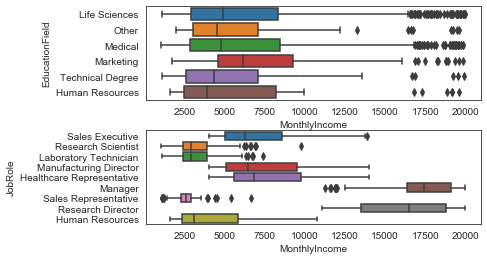

In [194]:
fig, ax = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.33)

sns.boxplot(x='MonthlyIncome', y='EducationField', data=df_copy, ax=ax[0])
sns.boxplot(x='MonthlyIncome', y='JobRole', data=df_copy, ax=ax[1])

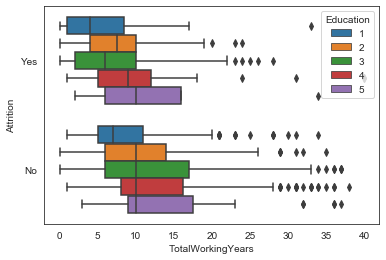

In [195]:
sns.boxplot(df_copy['TotalWorkingYears'],df_copy['Attrition'],df_copy['Education'])

In [196]:
df_copy.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.911565,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.791837,11.287075,2.798639,2.761224,7.011565,4.239456,2.187755,4.130612,0.161224
std,9.076878,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.850380,7.777840,1.289428,0.706476,6.124464,3.616740,3.222430,3.556499,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [197]:
df_copy.drop('Attrition', axis=1, inplace=True)

In [198]:
df_copy.drop(["EmployeeCount", "StandardHours"], axis=1, inplace=True)

In [199]:
df_copy=pd.get_dummies(df_copy, drop_first=True)

In [200]:
df_copy = df_copy[['EmployeeNumber','Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Target',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']]

In [201]:
df_copy.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,41,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,2,49,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,4,37,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,1,0,1
3,5,33,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,7,27,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


## DATA SCALING

In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
col_names = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',  
                                          'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                                          'TotalWorkingYears', 'TrainingTimesLastYear', 
                                          'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                                          'YearsWithCurrManager']

In [204]:
features=df_copy[col_names]
sc=StandardScaler().fit(features.values)
features=sc.transform(features.values)
df_copy[col_names]=features

## Choosing X and Y dataframes 

In [205]:
backup=df_copy.copy()
df_copy.drop("Target", axis=1, inplace=True)
X=df_copy
X = X.iloc[:,:].values
Y = backup['Target'].to_numpy()

## Train-Test split 

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)


In [207]:
test=pd.DataFrame(X_test,columns=df_copy.columns)
test=test.iloc[:,:].values
X_test=X_test[:,1:]
X_train=X_train[:,1:]

## Without PCA

In [208]:
# SVM Classifier without PCA
# TRAINING TIME 

start = time.time()

svc = SVC(kernel = 'rbf', probability = True)
svc.fit(X_train, y_train)

end = time.time()
svm_time = end-start
print('Train Time (seconds) of SVM without PCA:',svm_time)

/Users/maddisiddart/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Time (seconds) of SVM without PCA: 0.3380289077758789


In [209]:
# SVM PREDICTION 
y_pred_svc = svc.predict(X_test)

confusion_matrix_svc = confusion_matrix(y_test,y_pred_svc)
print("\nConfusion Matrix")
print(confusion_matrix_svc)

classify_svc = classification_report(y_test, y_pred_svc)
print("\nClassification Report")
print(classify_svc)

svm_acc = accuracy_score(y_test, svc.predict(X_test))
print(svm_acc)


Confusion Matrix
[[370   1]
 [ 60  10]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       371
           1       0.91      0.14      0.25        70

    accuracy                           0.86       441
   macro avg       0.88      0.57      0.59       441
weighted avg       0.87      0.86      0.82       441

0.8616780045351474


In [210]:
# RANDOM FOREST TRAIN 
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
random_forest_time = end - start
print('Train Time (seconds) of Random Forest without PCA:',random_forest_time)


Train Time (seconds) of Random Forest without PCA: 0.12526917457580566


In [211]:
# Random Forest PREDICTION 
y_pred_rfc = rf.predict(X_test)

confusion_matrix_rfc = confusion_matrix(y_test,y_pred_rfc)
print("\nConfusion Matrix")
print(confusion_matrix_rfc)

classify_rfc= classification_report(y_test, y_pred_rfc)
print("\nClassification Report")
print(classify_rfc)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(rf_acc)


Confusion Matrix
[[368   3]
 [ 58  12]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.80      0.17      0.28        70

    accuracy                           0.86       441
   macro avg       0.83      0.58      0.60       441
weighted avg       0.85      0.86      0.82       441

0.8616780045351474


In [212]:
# LOGISTIC REGRESSION TRAIN
logreg = LogisticRegression()
start = time.time()
logreg.fit(X_train, y_train)
end = time.time()
logistic_time = end - start
print('Train Time (seconds) of logistic regression without PCA:',logistic_time)



Train Time (seconds) of logistic regression without PCA: 0.05615687370300293


/Users/maddisiddart/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [213]:
#Logistic REGRESSION PREDICT 
y_pred_LR = logreg.predict(X_test)

confusion_matrix_LR = confusion_matrix(y_test,y_pred_LR)
print("\nConfusion Matrix")
print(confusion_matrix_LR)

classify_LR= classification_report(y_test, y_pred_LR)
print("\nClassification Report")
print(classify_LR)
LR_acc = accuracy_score(y_test, logreg.predict(X_test))
print(LR_acc)


Confusion Matrix
[[364   7]
 [ 40  30]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       371
           1       0.81      0.43      0.56        70

    accuracy                           0.89       441
   macro avg       0.86      0.70      0.75       441
weighted avg       0.89      0.89      0.88       441

0.8934240362811792


In [214]:
# Naive Bayes Train

naive = GaussianNB()
start=time.time()
naive.fit(X_train, y_train)
stop=time.time()
naive_time  = stop - start 
print("Time taken for naive bayes without pca : ", naive_time)


Time taken for naive bayes without pca :  0.005933046340942383


In [215]:
# Naive bayes Predict 
y_pred_NB = naive.predict(X_test)

confusion_matrix_NB = confusion_matrix(y_test,y_pred_NB)
print("\nConfusion Matrix")
print(confusion_matrix_NB)

classify_NB= classification_report(y_test, y_pred_NB)
print("\nClassification Report")
print(classify_NB)
NB_acc = accuracy_score(y_test, naive.predict(X_test))
print(NB_acc)


Confusion Matrix
[[225 146]
 [ 19  51]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.61      0.73       371
           1       0.26      0.73      0.38        70

    accuracy                           0.63       441
   macro avg       0.59      0.67      0.56       441
weighted avg       0.82      0.63      0.68       441

0.6258503401360545


## PCA

In [216]:
n=90
pca=PCA(n/100)
pca.fit(X_train)
print(pca.n_components_)

21


In [217]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [218]:
X_test_pca

array([[ 1.56332262, -0.34240799,  0.17636568, ...,  1.47666159,
         0.78591969,  0.6261033 ],
       [-1.26126231,  0.00466345,  2.10794834, ..., -0.97303861,
        -0.51950207, -0.56955945],
       [-0.93336987, -0.07708983, -0.00549073, ...,  1.23134549,
         0.22889714,  1.13060028],
       ...,
       [ 0.17260197,  1.74560978,  0.71653441, ..., -1.08613941,
         0.10094923,  0.55510726],
       [ 1.49970972,  1.64989869,  1.05736982, ..., -0.36472256,
         0.7092407 , -0.42228488],
       [ 2.00221559, -0.83986114,  1.56394667, ..., -0.63252659,
        -0.5259138 , -0.97327581]])

## SVM With PCA

In [219]:
start = time.time()

svc_pca = SVC(kernel = 'rbf', probability = True)
svc_pca.fit(X_train_pca, y_train)

end = time.time()
svm_time_pca = end-start
print('Train Time (seconds) of SVM with PCA:',svm_time_pca)

/Users/maddisiddart/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Time (seconds) of SVM with PCA: 0.3818318843841553


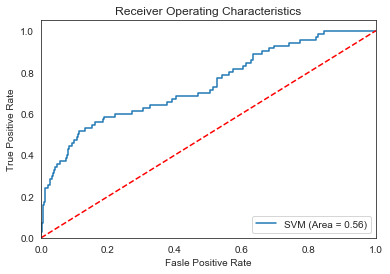


Confusion Matrix
[[369   2]
 [ 61   9]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.82      0.13      0.22        70

    accuracy                           0.86       441
   macro avg       0.84      0.56      0.57       441
weighted avg       0.85      0.86      0.81       441

0.8571428571428571


In [220]:
y_pred_svc_pca = svc_pca.predict(X_test_pca)

svc_roc_auc_pca = roc_auc_score(y_test,y_pred_svc_pca)
fpr, tpr, thresholds = roc_curve(y_test,svc_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (Area = %0.2f)' % svc_roc_auc_pca)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

confusion_matrix_svc_pca = confusion_matrix(y_test,y_pred_svc_pca)
print("\nConfusion Matrix")
print(confusion_matrix_svc_pca)

classify_svc_pca = classification_report(y_test, y_pred_svc_pca)
print("\nClassification Report")
print(classify_svc_pca)
svm_pca_acc = accuracy_score(y_test, svc_pca.predict(X_test_pca))
print(svm_pca_acc)

## Random Forest Classifier

In [221]:
rf_pca=RandomForestClassifier(n_estimators=10,criterion='entropy')
start = time.time()
rf_pca.fit(X_train_pca, y_train)
end = time.time()
rf_pca_time = end - start
print('Train Time (seconds) of Random Forest with PCA:',rf_pca_time)

y_pred_rf_pca = rf_pca.predict(X_test_pca)
confusion_matrix_rf_pca = confusion_matrix(y_test,y_pred_rf_pca)
print("\nConfusion Matrix")
print(confusion_matrix_rf_pca)

classify_rf_pca = classification_report(y_test, y_pred_rf_pca)
print("\nClassification Report")
print(classify_rf_pca)

rf_pca_acc = accuracy_score(y_test, rf_pca.predict(X_test_pca))
print(rf_pca_acc)

Train Time (seconds) of Random Forest with PCA: 0.13080716133117676

Confusion Matrix
[[367   4]
 [ 62   8]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.67      0.11      0.20        70

    accuracy                           0.85       441
   macro avg       0.76      0.55      0.56       441
weighted avg       0.83      0.85      0.80       441

0.8503401360544217


## Logistic Regression with PCA

In [222]:
logreg = LogisticRegression()
start = time.time()
logreg.fit(X_train_pca, y_train)
end = time.time()
lr_pca_time = end- start
print('Train Time (seconds) of logistic regression with PCA:',lr_pca_time)

print(classification_report(y_test, logreg.predict(X_test_pca)))

LR_pca_acc = accuracy_score(y_test, logreg.predict(X_test_pca))
print(LR_pca_acc)

Train Time (seconds) of logistic regression with PCA: 0.011168956756591797
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.70      0.20      0.31        70

    accuracy                           0.86       441
   macro avg       0.78      0.59      0.62       441
weighted avg       0.84      0.86      0.82       441

0.8594104308390023


/Users/maddisiddart/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Naive Bayes with PCA

In [223]:
naive = GaussianNB()
start=time.time()
naive.fit(X_train_pca, y_train)
stop=time.time()
NB_pca_time = stop - start
print("Time taken for naive bayes : ", NB_pca_time)

train_Pred = naive.predict(X_train_pca)
print(classification_report(y_test, logreg.predict(X_test_pca)))

NB_pca_acc = accuracy_score(y_test, naive.predict(X_test_pca))
print(NB_pca_acc)

Time taken for naive bayes :  0.012485265731811523
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.70      0.20      0.31        70

    accuracy                           0.86       441
   macro avg       0.78      0.59      0.62       441
weighted avg       0.84      0.86      0.82       441

0.8707482993197279


## GRAPHS FOR COMPARISION

In [224]:
time = {'Model': ['SVM','Random Forest','Logistic Regression','Naive Bayes'],
                  'Train Time - no PCA (s) ': [svm_time,random_forest_time, logistic_time,naive_time],
                  'Train Time - PCA (s) ': [svm_time_pca,rf_pca_time, lr_pca_time, NB_pca_time]
               }
tm = pd.DataFrame(data=time)

In [225]:
tm

,Model,Train Time - no PCA (s),Train Time - PCA (s)
0,SVM,0.338029,0.381832
1,Random Forest,0.125269,0.130807
2,Logistic Regression,0.056157,0.011169
3,Naive Bayes,0.005933,0.012485


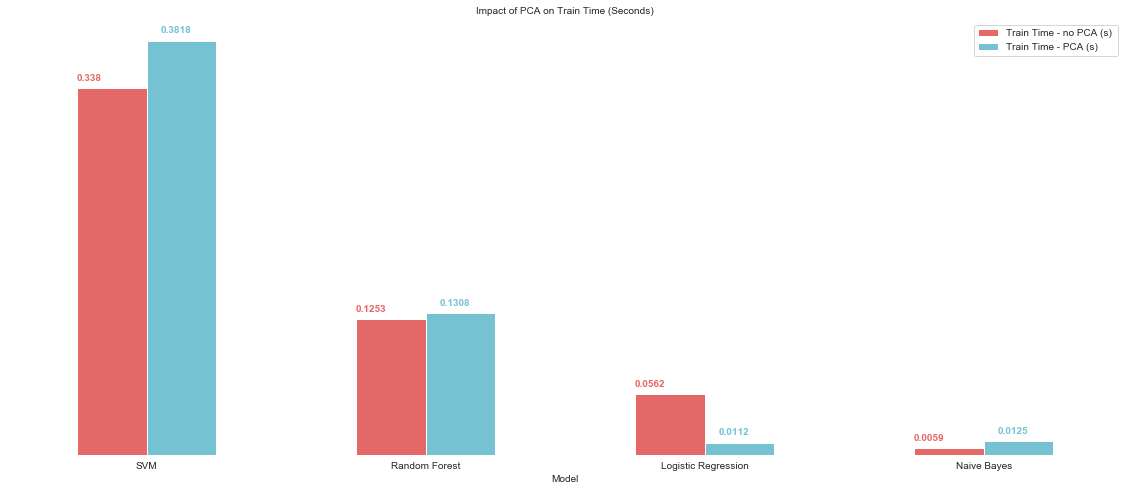

In [226]:
tm = tm.set_index('Model')
sns.set_style(style='white')

ax = tm.plot(kind='bar', figsize=(20,8), width=0.5, color=['#E56868', '#75C3D2'], fontsize=10)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on Train Time (Seconds)', fontsize=10)


for n in range(2):
    for index, val in enumerate(tm.iloc[:,n].transpose()): 
        label=str(round(val,4))
        
        if n==0:
            ax.annotate(label, xy=(index-0.25, val+0.007), color='#E56868', fontsize=10, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val+0.007), color='#75C3D2', fontsize=10, fontweight='bold')

In [227]:
accuracy = {'Models': ['SVM','Random Forest','Logistic Regression','Naive Bayes'], 
               'Accuracy - no PCA (%)': [svm_acc,rf_acc,LR_acc,NB_acc], 
               'Accuracy - PCA (%)': [svm_pca_acc,rf_pca_acc,LR_pca_acc,NB_pca_acc]
              }


acc = pd.DataFrame(data=accuracy)

acc

,Models,Accuracy - no PCA (%),Accuracy - PCA (%)
0,SVM,0.861678,0.857143
1,Random Forest,0.861678,0.850340
2,Logistic Regression,0.893424,0.859410
3,Naive Bayes,0.625850,0.870748


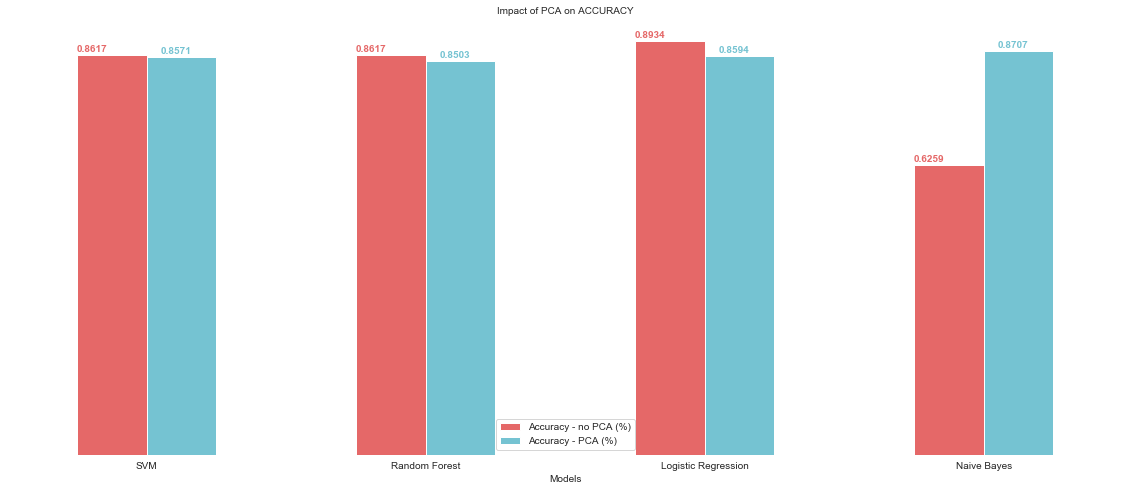

In [228]:
acc = acc.set_index('Models')
sns.set_style(style='white')

ax = acc.plot(kind='bar', figsize=(20,8), width=0.5, color=['#E56868', '#75C3D2'], fontsize=10)

#ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)
ax.yaxis.grid()
ax.get_yaxis().set_visible(False)
plt.title('Impact of PCA on ACCURACY', fontsize=10)


for n in range(2):
    for index, val in enumerate(acc.iloc[:,n].transpose()): 
        label=str(round(val,4))
        
        if n==0:
            ax.annotate(label, xy=(index-0.25, val+0.007), color='#E56868', fontsize=10, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index+0.05, val+0.007), color='#75C3D2', fontsize=10, fontweight='bold')

### REASON FOR ATTRITION 

In [229]:
y_pred=rf.predict(X_test)
probability=rf.predict_proba(X_test)

In [230]:
X_test_df=pd.DataFrame(test[:,0],columns=["EmployeeNumber"])
y_pred_df=pd.DataFrame(y_pred,columns=["prediction"])
probability_df=pd.DataFrame(probability,columns =["Not leaving","leaving"])
final_1=X_test_df.join(y_pred_df)
final=final_1.join(probability_df)


## Treeinterpreter

In [231]:
from treeinterpreter import treeinterpreter as ti 
predicted,bias,contributions = ti.predict(rf,X_test)       
max_contribution=[]       
for i in range(len(X_test_df['EmployeeNumber'])):
    lis=[]
    feature=[]
    new=[]
    for j,k in zip(contributions[i], df_copy.columns[1:]):
        lis.append(abs(j[1])*100)
        feature.append(k)
    for m in range(len(contributions[i])):    
        if lis[m]== max(lis):
                
            max_contribution.append(feature[m])
        else:
            pass
parameters=pd.DataFrame(max_contribution,columns=["max_weightage"])
final=final.join(parameters)   

In [232]:
final

,EmployeeNumber,prediction,Not leaving,leaving,max_weightage
0,592.0,0,0.9,0.1,MonthlyRate
1,1545.0,0,0.9,0.1,YearsInCurrentRole
2,1380.0,0,0.9,0.1,JobLevel
3,1092.0,0,0.9,0.1,YearsAtCompany
4,1868.0,1,0.1,0.9,TotalWorkingYears
...,...,...,...,...,...
436,1133.0,0,0.7,0.3,HourlyRate
437,530.0,0,0.9,0.1,YearsSinceLastPromotion
438,615.0,0,1.0,0.0,DistanceFromHome
439,543.0,0,1.0,0.0,MonthlyIncome


In [233]:
final_left = final[final['prediction']==1]
       

In [234]:
final_left

,EmployeeNumber,prediction,Not leaving,leaving,max_weightage
4,1868.0,1,0.1,0.9,TotalWorkingYears
13,741.0,1,0.3,0.7,OverTime_Yes
28,2021.0,1,0.0,1.0,OverTime_Yes
45,1939.0,1,0.4,0.6,OverTime_Yes
48,1248.0,1,0.1,0.9,OverTime_Yes
49,45.0,1,0.3,0.7,OverTime_Yes
123,19.0,1,0.3,0.7,OverTime_Yes
190,2054.0,1,0.4,0.6,Education
191,1783.0,1,0.3,0.7,OverTime_Yes
257,994.0,1,0.4,0.6,OverTime_Yes


## Quality of Attrition

In [235]:
perf=df[["Education","JobInvolvement", "JobSatisfaction", "PerformanceRating", "WorkLifeBalance"]].copy()


In [236]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(perf)
y_kmeans = kmeans.predict(perf)

In [237]:
print(kmeans)
print(y_kmeans)
print(kmeans.cluster_centers_)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[2 2 2 ... 1 1 0]
[[3.5136876  2.7310789  3.48493278 3.14009662 2.76811594]
 [3.01691729 2.7518797  1.47180451 3.15818264 2.77255639]
 [1.5615142  2.69085174 3.36347802 3.170347   2.72870662]]


In [238]:
jobperf_df=df.copy()
jobperf_df["Quality"]=y_kmeans

In [239]:
jobperf_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Quality
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1,6.0,4.000000,0,5.0,2
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80.0,1.0,10.0,3.0,3,10.0,7.000000,1,7.0,2
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80.0,0.0,7.0,3.0,3,0.0,4.240931,0,0.0,2
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80.0,0.0,8.0,3.0,3,8.0,7.000000,3,0.0,0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80.0,1.0,6.0,3.0,3,2.0,2.000000,2,2.0,2


In [240]:
jobperf_df.to_csv("performance.csv")
